# Task 01
Take your own photo, convert it into grayscale, and apply mean, 
gaussian, Laplacian, and sobel filters in the frequency domain and try 
to observe the effects of filter mask on your image.

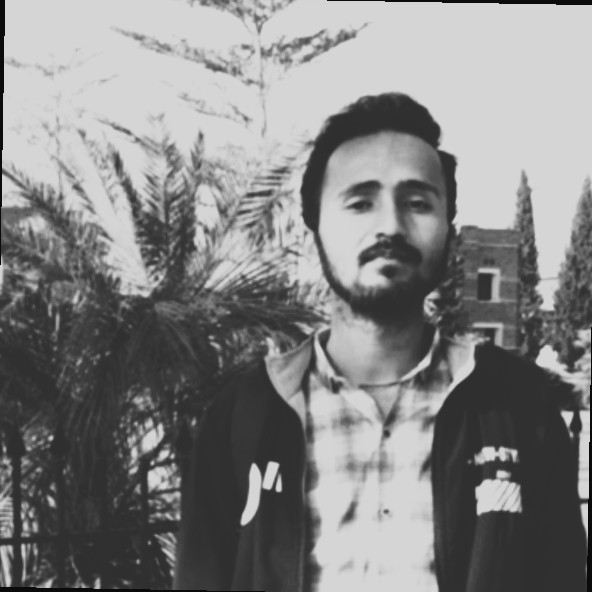

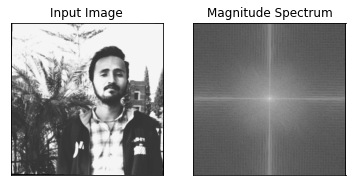

ValueError: ignored

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/2.jpg',0)
cv2_imshow(img)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
# create a mask first, center square is 1, remaining all zeros
# simple averaging filter without scaling parameter
mean_filter =1/9*np.ones((3,3), np.uint8)
#mask = mean_filter[crow-30:crow+30, ccol-30:ccol+30] = 1
fft_filter = np.fft.fft2(mean_filter, s=[198,220])
shifted_filter = np.fft.fftshift(fft_filter)
mask = shifted_filter
# apply mask and inverse DFT
fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum in mean filter'), plt.xticks([]), plt.yticks([])
plt.show()

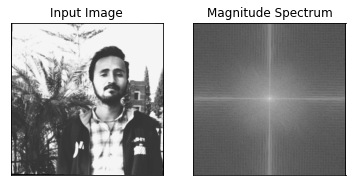

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/content/2.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


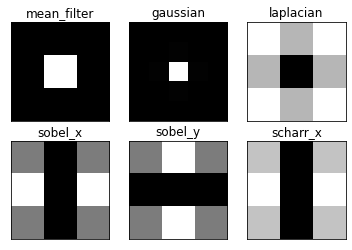

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/content/2.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))
# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
 [-10,0,10],
 [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
 [-2, 0, 2],
 [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
 [0, 0, 0],
 [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
 [1,-4, 1],
 [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
 'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
 plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

# Task 02
Write a python script to read image circles.png consisting of a white 
circle against a black background, use this image as an input to the 
fft2 function, and display the resulting spectrum. You should be able 
to notice the presence of “ringing” artifacts in the resulting 
spectrum, owing to the sharp transitions between the circle and the 
background.


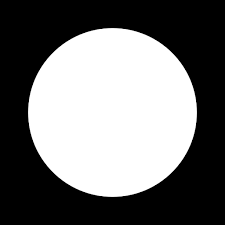

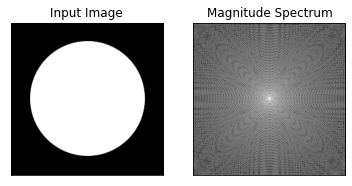

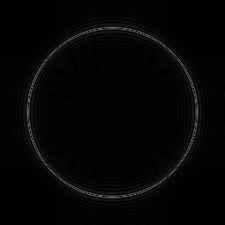

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/kha.png',0)
cv2_imshow(img)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
cv2_imshow(img_back)


# Task 03
Design a spatial-domain averaging filter whose output is the average of
the four neighbors of the center pixel in a 3 × 3 neighborhood. Obtain 
its frequency-domain equivalent and plot the resulting filter function. 
Apply the two filters, one at a time, to an input image of your choice 
and observe the results. Are there any noticeable differences? Explain

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/2.jpg',0)
cv2_imshow(img)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
# create a mask first, center square is 1, remaining all zeros
# simple averaging filter without scaling parameter
mean_filter =1/9*np.ones((3,3), np.uint8)
#mask = mean_filter[crow-30:crow+30, ccol-30:ccol+30] = 1
fft_filter = np.fft.fft2(mean_filter, s=[198,220])
shifted_filter = np.fft.fftshift(fft_filter)
mask = shifted_filter
# apply mask and inverse DFT
fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum in mean filter'), plt.xticks([]), plt.yticks([])
plt.show()
# second time appytng the filter on image.
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# create a mask first, center square is 1, remaining all zeros
# simple averaging filter without scaling parameter
mean_filter =1/9*np.ones((3,3), np.uint8)
#mask = mean_filter[crow-30:crow+30, ccol-30:ccol+30] = 1
fft_filter = np.fft.fft2(mean_filter, s=[198,220])
shifted_filter = np.fft.fftshift(fft_filter)
mask = shifted_filter
# apply mask and inverse DFT
fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum in mean filter'), plt.xticks([]), plt.yticks([])
plt.show()

